<a href="https://colab.research.google.com/github/DanDas3/Exercicios-Processamento-Imagem/blob/master/Lista-2019-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 !git clone https://github.com/DanDas3/Exercicios-Processamento-Imagem.git

Cloning into 'Exercicios-Processamento-Imagem'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 25 (delta 2), reused 22 (delta 0), pack-reused 0
Unpacking objects: 100% (25/25), done.


In [0]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

1)

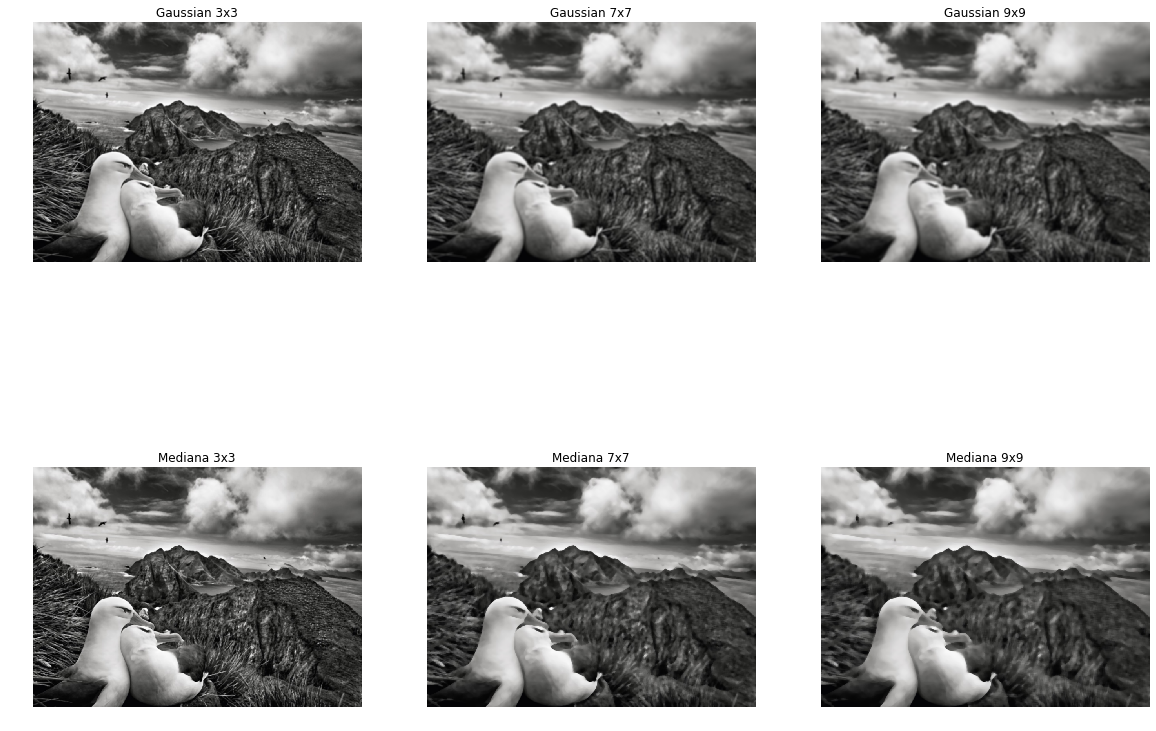

In [3]:
img = cv.imread("Exercicios-Processamento-Imagem/imagens-lista-1/image-q1.png")

fig,axes = plt.subplots(2, 3, figsize=(20, 15))
ax = axes.ravel()

out = cv.GaussianBlur(img, (3,3), sigmaX=3, sigmaY=3)
ax[0].imshow(cv.cvtColor(out, cv.COLOR_BGR2RGB))
ax[0].set_title("Gaussian 3x3")
ax[0].set_axis_off()

out = cv.GaussianBlur(img, (7,7), sigmaX=3, sigmaY=3)
ax[1].imshow(cv.cvtColor(out, cv.COLOR_BGR2RGB))
ax[1].set_title("Gaussian 7x7")
ax[1].set_axis_off()

out = cv.GaussianBlur(img, (9,9), sigmaX=3, sigmaY=3)
ax[2].imshow(cv.cvtColor(out, cv.COLOR_BGR2RGB))
ax[2].set_title("Gaussian 9x9")
ax[2].set_axis_off()

out = cv.medianBlur(img, 3)
ax[3].imshow(cv.cvtColor(out, cv.COLOR_BGR2RGB))
ax[3].set_title("Mediana 3x3")
ax[3].set_axis_off()

out = cv.medianBlur(img, 7)
ax[4].imshow(cv.cvtColor(out, cv.COLOR_BGR2RGB))
ax[4].set_title("Mediana 7x7")
ax[4].set_axis_off()

out = cv.medianBlur(img, 9)
ax[5].imshow(cv.cvtColor(out, cv.COLOR_BGR2RGB))
ax[5].set_title("Mediana 9x9")
ax[5].set_axis_off()


plt.show()

2)

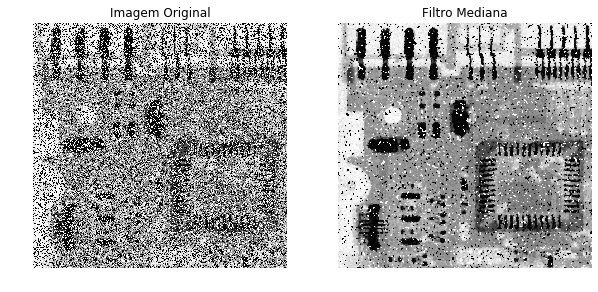

In [7]:
img = cv.imread("Exercicios-Processamento-Imagem/imagens-lista-1/image-q2.png")

# Filtro Mediana
mediana = cv.medianBlur(img, 3)

fig,axes = plt.subplots(1, 2, figsize=(10, 5))
ax = axes.ravel()

ax[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax[0].set_title("Imagem Original")
ax[0].set_axis_off()

ax[1].imshow(mediana)
ax[1].set_title("Filtro Mediana")
ax[1].set_axis_off()

plt.show()

4)

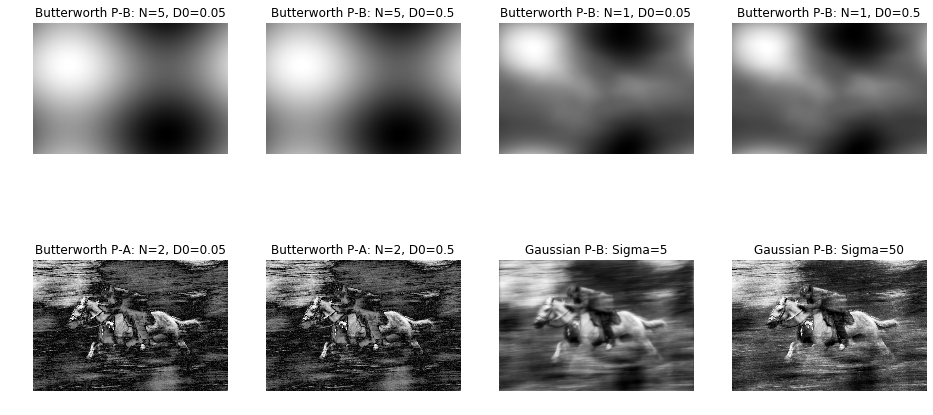

In [8]:
img = cv.imread("Exercicios-Processamento-Imagem/imagens-lista-1/image-q4.png",0)

linha = img.shape[0]
coluna = img.shape[1]

clinha = linha // 2
ccoluna = coluna // 2

#transformada discreta de fourier
dft = cv.dft(np.float32(img),flags = cv.DFT_COMPLEX_OUTPUT)

dft_shift = np.fft.fftshift(dft) #mudança do ponto DC Mudança de centro

magnitude_spectrum = 20*np.log(cv.magnitude(dft_shift[:,:,0],dft_shift[:,:,1])) #logarítimo para melhor visualização

#retoma o ponto central para o canto da imagem
f_ishift = np.fft.ifftshift(dft_shift)

# Criando o filtro gaussiano
x_size, y_size = linha,coluna
x_arr, y_arr = np.mgrid[0:x_size, 0:y_size]

cell = (x_size//2, y_size//2)

#matriz com as distâncias
dists = np.sqrt((x_arr - cell[0])**2 + (y_arr - cell[1])**2)

mask1 = np.zeros((linha, coluna,2))
mask2 = np.zeros((linha, coluna,2))
mask3 = np.zeros((linha,coluna,2))

# Exibição
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
ax = axes.ravel()

#*************************************************************************
# Filtro Butterworth
#*************************************************************************

# Passa baixa
# a)
filtro = 1/(1 + (np.divide(dists, 0.05))**(2*5))
mask1[:,:,0] = filtro
mask1[:,:,1] = filtro

# Aplica a filtragem
f_shift1 = dft_shift*mask1

# Transformada inversa
f_ishift = np.fft.ifftshift(f_shift1)

#Recupera a imagem
img_back1 = cv.idft(f_ishift)
img_back1 = cv.magnitude(img_back1[:,:,0],img_back1[:,:,1])

ax[0].imshow(img_back1, cmap='gray')
ax[0].set_title('Butterworth P-B: N=5, D0=0.05')
ax[0].set_axis_off()

# b)
filtro = 1/(1 + (np.divide(dists, 0.5))**(2*5))
mask1[:,:,0] = filtro
mask1[:,:,1] = filtro

# Aplica a filtragem
f_shift1 = dft_shift*mask1

# Transformada inversa
f_ishift = np.fft.ifftshift(f_shift1)

#Recupera a imagem
img_back2 = cv.idft(f_ishift)
img_back2 = cv.magnitude(img_back2[:,:,0],img_back2[:,:,1])

ax[1].imshow(img_back2, cmap='gray')
ax[1].set_title('Butterworth P-B: N=5, D0=0.5')
ax[1].set_axis_off()

# c)
filtro = 1/(1 + (np.divide(dists, 0.05))**(2*1))
mask1[:,:,0] = filtro
mask1[:,:,1] = filtro

# Aplica a filtragem
f_shift1 = dft_shift*mask1

# Transformada inversa
f_ishift = np.fft.ifftshift(f_shift1)

#Recupera a imagem
img_back3 = cv.idft(f_ishift)
img_back3 = cv.magnitude(img_back3[:,:,0],img_back3[:,:,1])

ax[2].imshow(img_back3, cmap='gray')
ax[2].set_title('Butterworth P-B: N=1, D0=0.05')
ax[2].set_axis_off()

# d)
filtro = 1/(1 + (np.divide(dists, 0.5))**(2*1))
mask1[:,:,0] = filtro
mask1[:,:,1] = filtro

# Aplica a filtragem
f_shift1 = dft_shift*mask1

# Transformada inversa
f_ishift = np.fft.ifftshift(f_shift1)

#Recupera a imagem
img_back4 = cv.idft(f_ishift)
img_back4 = cv.magnitude(img_back4[:,:,0],img_back4[:,:,1])

ax[3].imshow(img_back4, cmap='gray')
ax[3].set_title('Butterworth P-B: N=1, D0=0.5')
ax[3].set_axis_off()

#****************************************************************************************
# Passa alta
filtro1 = 1/(1 + (np.divide(dists, 0.05))**(2*2))
mask2[:,:,0] = filtro1
mask2[:,:,1] = filtro1
mask2 = 1 - mask2

# Aplica a filtragem
f_shift = dft_shift*mask2

# Transformada inversa
f_ishift = np.fft.ifftshift(f_shift)

#Recupera a imagem
img_back5 = cv.idft(f_ishift)
img_back5 = cv.magnitude(img_back5[:,:,0],img_back5[:,:,1])

ax[4].imshow(img_back5, cmap='gray')
ax[4].set_title('Butterworth P-A: N=2, D0=0.05')
ax[4].set_axis_off()

# f)
filtro1 = 1/(1 + (np.divide(dists, 0.5))**(2*2))
mask2[:,:,0] = filtro1
mask2[:,:,1] = filtro1
mask2 = 1 - mask2

# Aplica a filtragem
f_shift = dft_shift*mask2

# Transformada inversa
f_ishift = np.fft.ifftshift(f_shift)

#Recupera a imagem
img_back6 = cv.idft(f_ishift)
img_back6 = cv.magnitude(img_back6[:,:,0],img_back6[:,:,1])

ax[5].imshow(img_back6, cmap='gray')
ax[5].set_title('Butterworth P-A: N=2, D0=0.5')
ax[5].set_axis_off()

#***********************************************************************
# Filtro Gaussiano
#***********************************************************************

#sigma (parâmetro da equação da gaussiana)
sigma = 5

#equação da gaussiana
u = 2*(sigma**2)
arg= -np.divide(dists,u);
filtro3=np.exp(arg); 

mask3[:,:,0] = filtro3
mask3[:,:,1] = filtro3

# Aplica a filtragem
f_shift = dft_shift*mask3

# Transformada inversa
f_ishift = np.fft.ifftshift(f_shift)

#Recupera a imagem
img_back7 = cv.idft(f_ishift)
img_back7 = cv.magnitude(img_back7[:,:,0],img_back7[:,:,1])

ax[6].imshow(img_back7, cmap='gray')
ax[6].set_title('Gaussian P-B: Sigma=5')
ax[6].set_axis_off()

#sigma (parâmetro da equação da gaussiana)
sigma = 50

#equação da gaussiana
u = 2*(sigma**2)
arg= -np.divide(dists,u);
filtro3=np.exp(arg); 

mask3[:,:,0] = filtro3
mask3[:,:,1] = filtro3

# Aplica a filtragem
f_shift = dft_shift*mask3

# Transformada inversa
f_ishift = np.fft.ifftshift(f_shift)

#Recupera a imagem
img_back8 = cv.idft(f_ishift)
img_back8 = cv.magnitude(img_back8[:,:,0],img_back8[:,:,1])

ax[7].imshow(img_back8, cmap='gray')
ax[7].set_title('Gaussian P-B: Sigma=50')
ax[7].set_axis_off()

plt.show()

6)

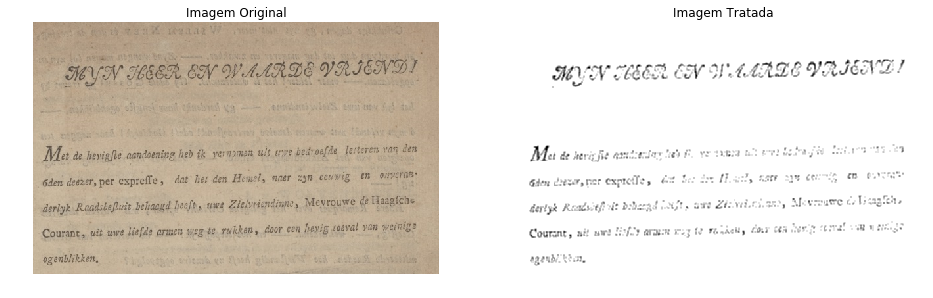

In [9]:
img = cv.imread("Exercicios-Processamento-Imagem/imagens-lista-1/image-q6.png")

ret,out = cv.threshold(img, 127, 255, cv.THRESH_BINARY)

linha, coluna, dim = out.shape

# Preenche com branco qualquer pixel diferente de preto
for i in range(linha):
    for j in range(coluna):
        if(out[i][j][0]>0 or out[i][j][1]>0 or out[i][j][2]>0):
            out[i][j][0] = out[i][j][1] = out[i][j][2] = 255


estruturante = np.zeros((3,3))

estruturante[0][0] = estruturante[0][1] = estruturante[0][2] = 1
estruturante[1][0] = estruturante[1][2] = 1
estruturante[2][0] = estruturante[2][1] = estruturante[2][2] = 1

kernel = np.zeros((3,3))
kernel[:,:] = 1/9

out = cv.filter2D(out, 3, kernel)

fig, axes = plt.subplots(1, 2, figsize=(16, 8))
ax = axes.ravel()
ax[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax[0].set_title('Imagem Original')
ax[0].set_axis_off()

ax[1].imshow(out, "gray")
ax[1].set_title('Imagem Tratada')
ax[1].set_axis_off()

plt.show()